# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [104]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [105]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [106]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [107]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [108]:
# Your code here :
from sklearn.model_selection import train_test_split


X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
 

Shape of X_train: (404, 13)
Shape of Y_train: (404,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [109]:
# Your code here :
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)

lm.fit(X_train, Y_train)

print(lm.intercept_, lm.coef_)

Y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(x_test)



Shape of X_train: (404, 13)
Shape of Y_train: (404,)
34.08963391356903 [-9.86523958e-02  4.67429816e-02  3.03589576e-02  3.01614165e+00
 -1.81186387e+01  3.73325846e+00  1.46988182e-02 -1.37756896e+00
  3.24385909e-01 -1.35548339e-02 -8.20105607e-01  9.09573893e-03
 -5.61054872e-01]


## 3. Calculate and print R-squared for both the training and the testing set.

In [110]:
# Your code here :
from sklearn.metrics import mean_squared_error, r2_score

print('Score:')
print(r2_score(Y_train, Y_train_pred), r2_score(y_test, y_test_pred))

print('MSE:')
print(mean_squared_error(Y_train, Y_train_pred), mean_squared_error(y_test, y_test_pred))

Score:
0.736159238423712 0.7484031678924544
MSE:
22.427871876091487 20.55805163422985


## 4. Calculate and print mean squared error for both the training and the testing set.

In [111]:
# Your code here :
print(mean_squared_error(Y_train, Y_train_pred), mean_squared_error(y_test, y_test_pred))

22.427871876091487 20.55805163422985


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [112]:
# Your code here :
from sklearn.metrics import mean_absolute_error

# Calculate MAE for training set
mae_train = mean_absolute_error(Y_train, Y_train_pred)

# Calculate MAE for testing set
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results
print("Mean Absolute Error:")
print(f"Training set: {mae_train:.4f}")
print(f"Testing set:  {mae_test:.4f}")


Mean Absolute Error:
Training set: 3.3128
Testing set:  3.2741


## Classification Model Evaluation

In [113]:
from sklearn.datasets import load_iris
data = load_iris()

In [114]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [115]:
column_names = data.feature_names

In [116]:
df = pd.DataFrame(data['data'],columns=column_names)

In [117]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [118]:
target = pd.DataFrame(data.target)

In [119]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [120]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [121]:
# Your code here :
from sklearn.model_selection import train_test_split


# Split the data into features (X) and target (y)
X = df.copy()
y = data.target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)





Training set shape: (120, 4)
Testing set shape: (30, 4)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [130]:
# Your code here :
from sklearn.linear_model import LogisticRegression

# Initialize and train the LogisticRegression model
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)

# Generate predictions on both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

 


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [132]:
# Your code here :
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score


# Calculate overall accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Overall Training Accuracy:", train_accuracy)
print("Overall Testing Accuracy:", test_accuracy)

# Generate detailed classification report
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTesting Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Overall Training Accuracy: 0.95
Overall Testing Accuracy: 0.9666666666666667

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.90      0.93        41
           2       0.90      0.95      0.93        39

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120


Testing Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [133]:
# Your code here :
from sklearn.metrics import balanced_accuracy_score

train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print("Training set balanced accuracy:", train_balanced_accuracy)
print("Testing set balanced accuracy:", test_balanced_accuracy)


Training set balanced accuracy: 0.9503856577027309
Testing set balanced accuracy: 0.9629629629629629


## 10. Calculate and print the precision score for both the training and the testing set.

In [125]:
# Your code here :
from sklearn.metrics import precision_score

train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')

print("Training set precision:", train_precision)
print("Testing set precision:", test_precision)


Training set precision: 0.9507713154054618
Testing set precision: 0.9694444444444444


## 11. Calculate and print the recall score for both the training and the testing set.

In [126]:
# Your code here :
from sklearn.metrics import recall_score

train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

print("Training set recall:", train_recall)
print("Testing set recall:", test_recall)


Training set recall: 0.95
Testing set recall: 0.9666666666666667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [127]:
# Your code here :
from sklearn.metrics import f1_score

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Training set F1 score:", train_f1)
print("Testing set F1 score:", test_f1)


Training set F1 score: 0.9500000000000001
Testing set F1 score: 0.9664109121909632


## 13. Generate confusion matrices for both the training and the testing set.

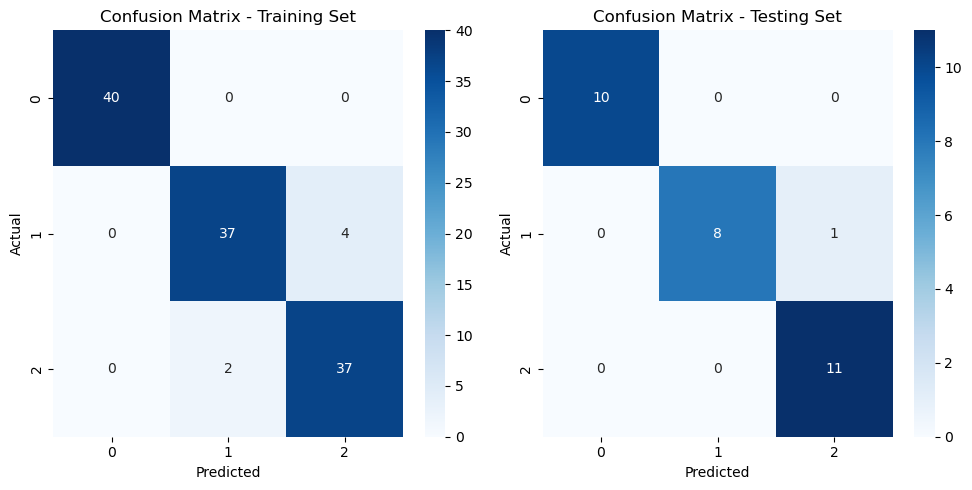

In [128]:
# Your code here :
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix for training set
train_cm = confusion_matrix(y_train, y_train_pred)

# Generate confusion matrix for testing set
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for training set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are already defined with Iris data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Detailed classification report
print("\nTraining Set Classification report:")
print(classification_report(y_train, y_train_pred))



Training Accuracy: 1.0
Testing Accuracy: 1.0

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

